AIM- what is the influence of parents background, test prep to student's score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



### Data Understanding

In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Handling memory consumption

In [6]:
## changing data type of some columns for less memory consumption
df['gender']=df['gender'].astype('category')
df['race/ethnicity']=df['race/ethnicity'].astype('category')
df['parental level of education']=df['parental level of education'].astype('category')
df['test preparation course']=df['test preparation course'].astype('category')
df['lunch']=df['lunch'].astype('category')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test preparation course      1000 non-null   category
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 29.2 KB


Memory usage reduced from 62KB to 29KM by using correct data type for columns


## Data Cleaning and Preprocessing

In [8]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [9]:
df.duplicated().sum()

np.int64(0)

No duplicates or null values

## EDA

In [10]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [11]:
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [12]:
df['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [13]:
df['lunch'].value_counts()

,count
lunch,
standard,645
free/reduced,355


In [14]:
df['test preparation course'].value_counts()

,count
test preparation course,
none,642
completed,358


No imbalance in dataset


<Axes: xlabel='math score', ylabel='Count'>

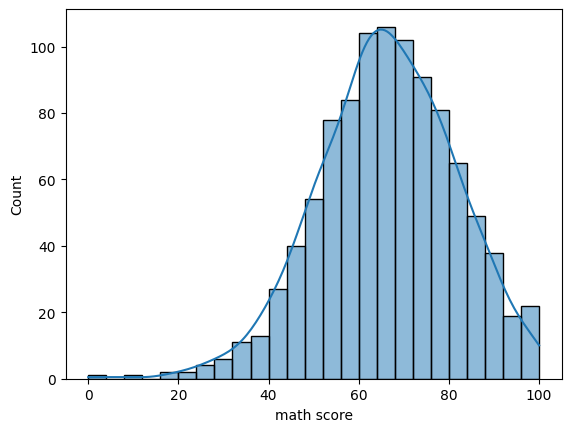

In [73]:
sns.histplot(df['math score'], kde=True)

<Axes: xlabel='reading score', ylabel='Count'>

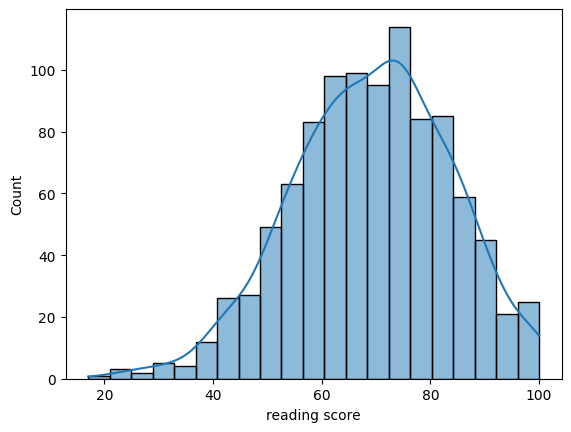

In [74]:
sns.histplot(df['reading score'], kde=True)

<Axes: xlabel='writing score', ylabel='Count'>

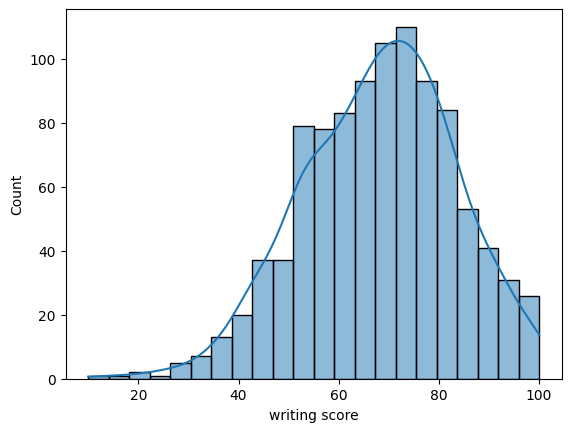

In [75]:
sns.histplot(df['writing score'], kde=True)

Data is **right skewed**

In [15]:
# calculating average score based on gender

############-------MISTAKE-----------##########
# df['gender'](df['math score'].mean())

############-------MISTAKE-----------##########
# df.groupby('gender')(df['math score']).mean()


#Correct code-
df.groupby('gender')['math score'].mean()


<ipython-input-15-7bef9156e2fe>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('gender')['math score'].mean()


,math score
gender,
female,63.633205
male,68.728216


In [16]:
df.groupby('gender')['reading score'].mean()

<ipython-input-16-c0a3af5fc10f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('gender')['reading score'].mean()


,reading score
gender,
female,72.608108
male,65.473029


In [17]:
df.groupby('gender')['writing score'].mean()

<ipython-input-17-1b826e071a3f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('gender')['writing score'].mean()


,writing score
gender,
female,72.467181
male,63.311203


Question-


*   Among students with a given parental education level, do males and females score differently?
*   Does gender impact scores differently across levels of parental education?
*   Do higher parental education levels reduce performance gaps between genders?








In [18]:
#########---------MISTAKE---------#########
# df.groupby('parental level of education')['gender','math score'].mean()

#########---------MISTAKE---------#########
# df.groupby(('parental level of education')('gender'))[['math score']].mean()

#########---------correct code---------#########
df.groupby(['parental level of education','gender'])['math score'].mean()


<ipython-input-18-950b6d3e9d4b>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['parental level of education','gender'])['math score'].mean()


parental level of education  gender
associate's degree           female    65.250000
                             male      70.764151
bachelor's degree            female    68.349206
                             male      70.581818
high school                  female    59.351064
                             male      64.705882
master's degree              female    66.500000
                             male      74.826087
some college                 female    65.406780
                             male      69.009259
some high school             female    59.296703
                             male      67.840909
Name: math score, dtype: float64

Answers-

Question 1-Among students with a given parental education level, do males and females score differently?

*   Females tend to score higher in reading and writing.
*   Males might perform slightly better in math in some groups, but not always.

Question 2-Does gender impact scores differently across levels of parental education?
*   In lower education levels (like high school), the gender gap (especially in reading/writing) tends to be larger.
*   In higher education levels (like bachelor's or master's), the gap may narrow or shift slightly, possibly due to better home learning environments or awareness.

Question 3-Do higher parental education levels reduce performance gaps between genders?
*   As parental education increases, access to resources, study habits, and support improve.
*   These benefits tend to elevate both genders, but often narrow the gender gap, especially in reading and writing.










In [19]:
#visualization
# this will create a df with these 3 cols
grouped=df.groupby(['parental level of education','gender'])['math score'].mean().reset_index()
grouped

<ipython-input-19-9ac22b18cca0>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=df.groupby(['parental level of education','gender'])['math score'].mean().reset_index()


,parental level of education,gender,math score
0,associate's degree,female,65.250000
1,associate's degree,male,70.764151
2,bachelor's degree,female,68.349206
3,bachelor's degree,male,70.581818
4,high school,female,59.351064
5,high school,male,64.705882
6,master's degree,female,66.500000
7,master's degree,male,74.826087
8,some college,female,65.406780
9,some college,male,69.009259


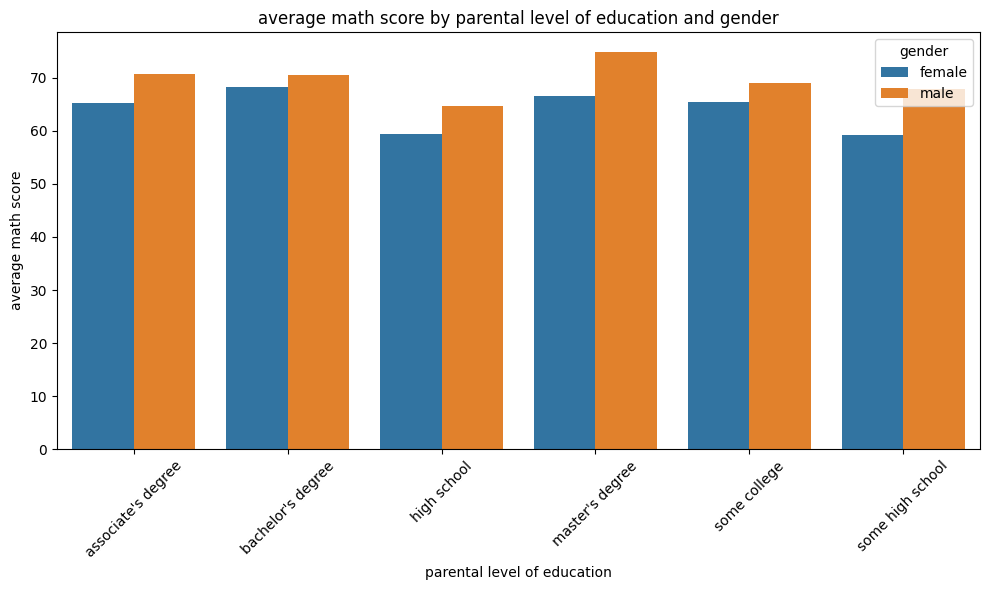

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=grouped,
    x='parental level of education',
    y='math score',
    hue='gender' # to include third variable #breaking the visualization into third category.
)
plt.xticks(rotation=45) #to rotate the x axis labels by 45 degrees
plt.title('average math score by parental level of education and gender')
plt.xlabel('parental level of education')
plt.ylabel('average math score')
plt.legend(title='gender')
plt.tight_layout() # ensures everything fits in figure nicely
plt.show()


Question-

*   How does test preparation course completion affect performance across different parental education levels?
*   Is the impact of test prep course stronger for students from lower-educated families?
*   Are there any education levels where test prep doesn't make much difference?












In [21]:
###########-------------------MISTAKE-------------------#################
# df.groupby[('test preparation course','parental level of education')]['math score'].mean()

# Correct code-
df.groupby(['test preparation course','gender','parental level of education'])['math score'].mean()

<ipython-input-21-7934827bd3e8>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['test preparation course','gender','parental level of education'])['math score'].mean()


test preparation course  gender  parental level of education
completed                female  associate's degree             70.047619
                                 bachelor's degree              71.000000
                                 high school                    61.896552
                                 master's degree                69.857143
                                 some college                   67.928571
                                 some high school               63.828571
                         male    associate's degree             73.700000
                                 bachelor's degree              75.375000
                                 high school                    68.333333
                                 master's degree                72.333333
                                 some college                   75.685714
                                 some high school               69.095238
none                     female  associate's degree             62.527027
                                 bachelor's degree              66.926829
                                 high school                    58.215385
                                 master's degree                64.363636
                                 some college                   64.013158
                                 some high school               56.464286
                         male    associate's degree             68.984848
                                 bachelor's degree              66.870968
                                 high school                    63.400000
                                 master's degree                75.705882
                                 some college                   65.808219
                                 some high school               66.695652
Name: math score, dtype: float64

<ipython-input-22-3e5779792e3a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped2=df.groupby(['test preparation course','gender','parental level of education'])['math score'].mean().reset_index()


<Figure size 1000x1500 with 0 Axes>

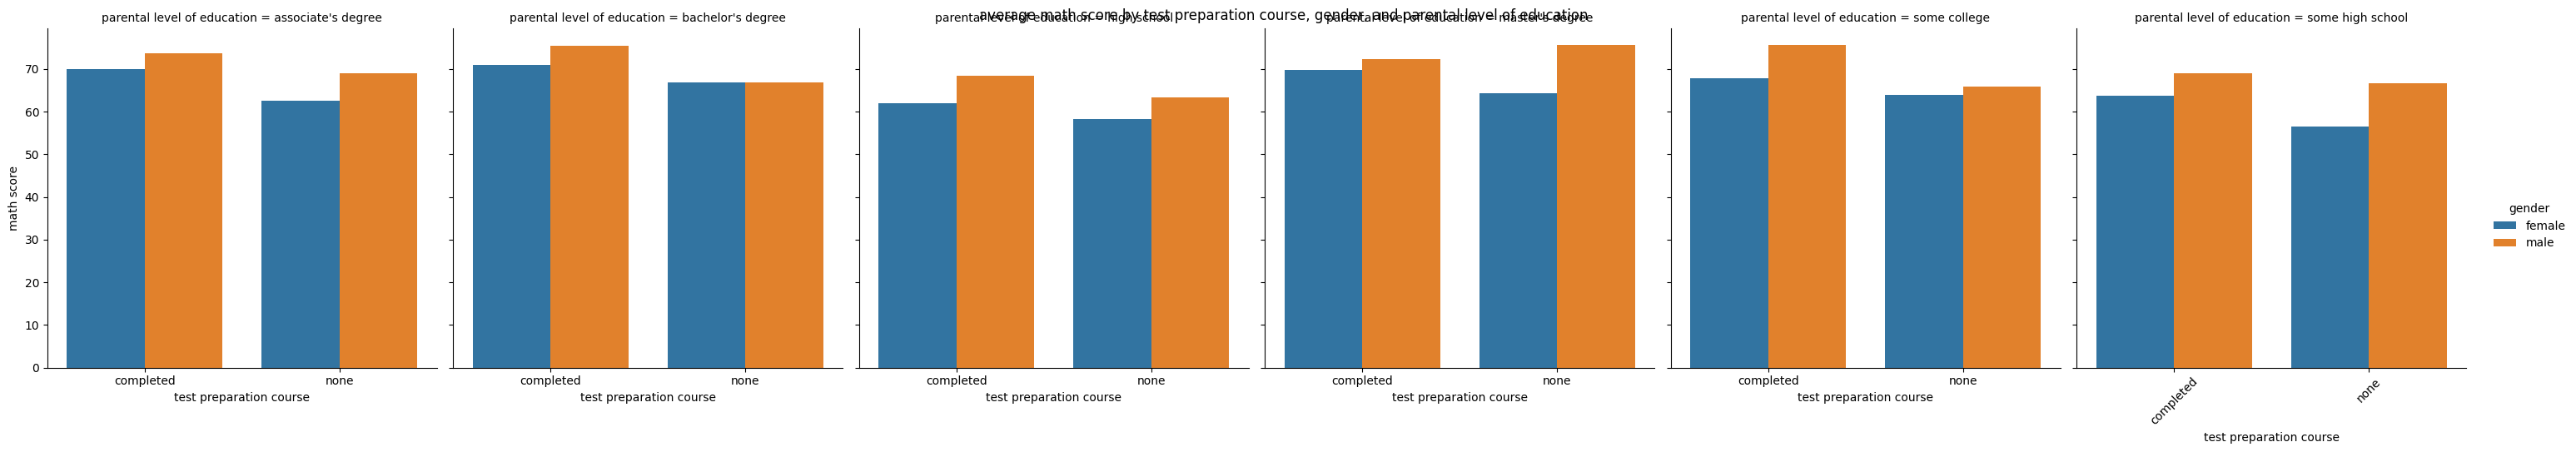

In [22]:
grouped2=df.groupby(['test preparation course','gender','parental level of education'])['math score'].mean().reset_index()
plt.figure(figsize=(10,15))
sns.catplot(
    data=grouped2,
    x='test preparation course',
    y='math score',
    hue='gender',
    col='parental level of education',
    kind='bar',
    height=5,
    aspect=1
)
plt.xticks(rotation=45)
plt.suptitle('average math score by test preparation course, gender, and parental level of education')
plt.show()

Answers-
Question 1-How does test preparation course completion affect performance across different parental education levels?

*   The performance boost is visible at every education level, but its magnitude varies.

Question 2-Is the impact of test prep course stronger for students from lower-educated families?

*   Students from families with lower parental education (e.g., high school or below) often start with lower baseline scores.
*   Completing the test prep course helps close the performance gap they have compared to peers from higher-educated families.

Question 3-Are there any education levels where test prep doesn't make much difference?

*   at higher parental education levels (e.g., master's degree), the performance gap between test-prep completers and non-completers becomes smaller.




Question-

*   Is there a subject where students struggle the most, on average?




In [23]:
df[['math score','writing score','reading score']].mean()

,0
math score,66.089
writing score,68.054
reading score,69.169


Answers-
Question 1- Is there a subject where students struggle the most, on average?

*   Yes, Maths.




Question-

*   Which gender benefits more from completing the test preparation course?




In [24]:
df.groupby(['gender','test preparation course'])['math score'].mean()

<ipython-input-24-df726dd5adf0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['gender','test preparation course'])['math score'].mean()


gender  test preparation course
female  completed                  67.195652
        none                       61.670659
male    completed                  72.339080
        none                       66.688312
Name: math score, dtype: float64

<Axes: xlabel='test preparation course', ylabel='math score'>

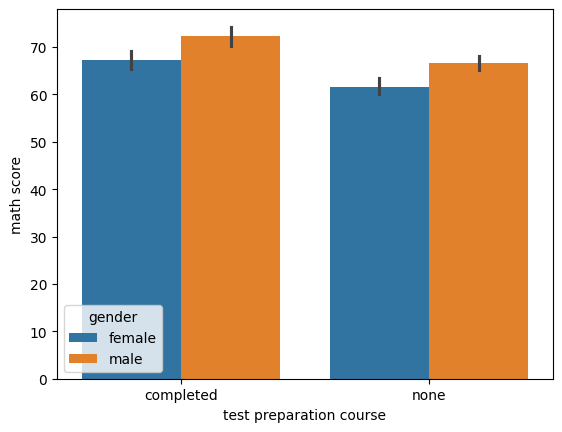

In [25]:
sns.barplot(data=df,x='test preparation course',y='math score', hue='gender')

Answer-
Question 1-Which gender benefits more from completing the test preparation course?


*   Both genders benefit significantly from completing the test preparation course, but:
1.   Males tend to show slightly greater improvement in math scores.
2.   Females tend to benefit more in reading and writing scores.







In [26]:
df.groupby(['gender','test preparation course'])['writing score'].mean()

<ipython-input-26-9c6e0fc1f5ed>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['gender','test preparation course'])['writing score'].mean()


gender  test preparation course
female  completed                  78.793478
        none                       68.982036
male    completed                  69.793103
        none                       59.649351
Name: writing score, dtype: float64

<Axes: xlabel='test preparation course', ylabel='writing score'>

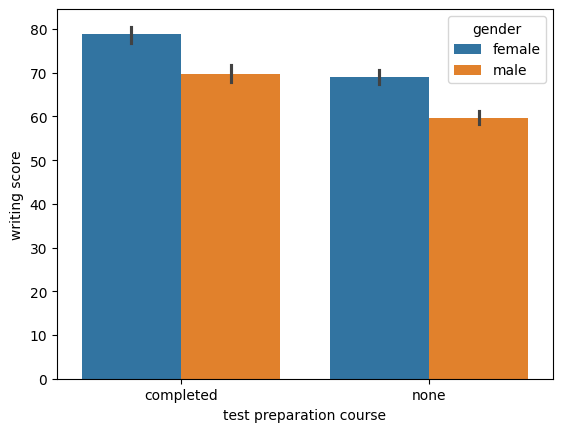

In [27]:
sns.barplot(data=df,x='test preparation course',y='writing score', hue='gender')

In [28]:
df.groupby(['gender','test preparation course'])['reading score'].mean()

<ipython-input-28-f9b29a332ff7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['gender','test preparation course'])['reading score'].mean()


gender  test preparation course
female  completed                  77.375000
        none                       69.982036
male    completed                  70.212644
        none                       62.795455
Name: reading score, dtype: float64

<Axes: xlabel='test preparation course', ylabel='reading score'>

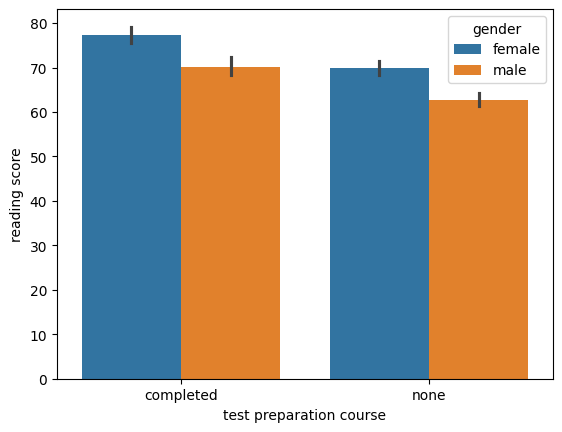

In [29]:
sns.barplot(data=df,x='test preparation course',y='reading score', hue='gender')

Question-

*   Is there a gap in math vs reading/writing performance by gender?




In [30]:
df.groupby('gender')[['math score','reading score','writing score']].mean()

<ipython-input-30-dd1452b1aed4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('gender')[['math score','reading score','writing score']].mean()


,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


Answer-
Question-Is there a gap in math vs reading/writing performance by gender?

*   Yes, Males are doing better in Math while Females are better in reading/writing




Question-

*   Do students who have free/reduced lunch perform differently than those with standard lunch?




In [31]:
df.groupby(['lunch','gender'])[['math score','reading score','writing score']].mean()

<ipython-input-31-8d1eaef2e673>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['lunch','gender'])[['math score','reading score','writing score']].mean()


math score  reading score  writing score
lunch        gender                                          
free/reduced female   55.814815      67.386243      66.444444
             male     62.457831      61.542169      59.126506
standard     female   68.124620      75.607903      75.927052
             male     72.022152      67.537975      65.509494

Answer-
Question-Do students who have free/reduced lunch perform differently than those with standard lunch?

*   Yes — students who receive free/reduced lunch typically perform worse than those who receive standard lunch, indicating a socioeconomic performance gap.




*   Which combination of gender and test prep status shows the highest and lowest overall performance?

In [32]:
df.groupby(['gender','test preparation course'])[['math score','reading score','writing score']].mean()

<ipython-input-32-4ba4b071ec98>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['gender','test preparation course'])[['math score','reading score','writing score']].mean()


math score  reading score  writing score
gender test preparation course                                          
female completed                 67.195652      77.375000      78.793478
       none                      61.670659      69.982036      68.982036
male   completed                 72.339080      70.212644      69.793103
       none                      66.688312      62.795455      59.649351

Answer-
Question-Which combination of gender and test prep status shows the highest and lowest overall performance?

1.   Test prep boosts scores for both genders, but:

*   The performance boost is greater for females, especially in reading and writing.
*   Males who skip test prep show the lowest writing scores, which drags down their average.
*   Preparation narrowed the gender gap in math.
*   But amplified differences in writing and reading (where females benefit more).





Question-


*   Which parental education level shows the most balanced performance across all subjects?

This can be seen by checking VARIABILITY- to see how spread out or consistent the scores are for each subject within different groups




Variability is checking by these factors-

*   Standard Deviation (std) – how spread out scores are
*   Range – max − min
*   Interquartile Range (IQR) – Q3 − Q1








In [33]:
df.groupby(['parental level of education','gender'])[['math score','reading score','writing score']].std()

<ipython-input-33-bf4da99e0865>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['parental level of education','gender'])[['math score','reading score','writing score']].std()


math score  reading score  writing score
parental level of education gender                                          
associate's degree          female   14.879151      13.200893      13.307076
                            male     14.905130      13.798564      14.077187
bachelor's degree           female   15.635112      14.251688      13.750576
                            male     14.158744      12.766090      13.796428
high school                 female   15.123653      14.082384      14.378917
                            male     13.551945      13.457473      12.669189
master's degree             female   15.579290      14.830123      14.558557
                            male     13.230997      11.906088      11.987642
some college                female   13.713950      12.392166      13.343488
                            male     14.774628      14.456183      14.716521
some high school            female   16.957132      16.606191      16.965511
                            male     13.567106      13.961654      13.576782

<ipython-input-34-43d9732ef815>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = df.groupby(['parental level of education', 'gender'])[['math score', 'reading score', 'writing score']].std().reset_index()


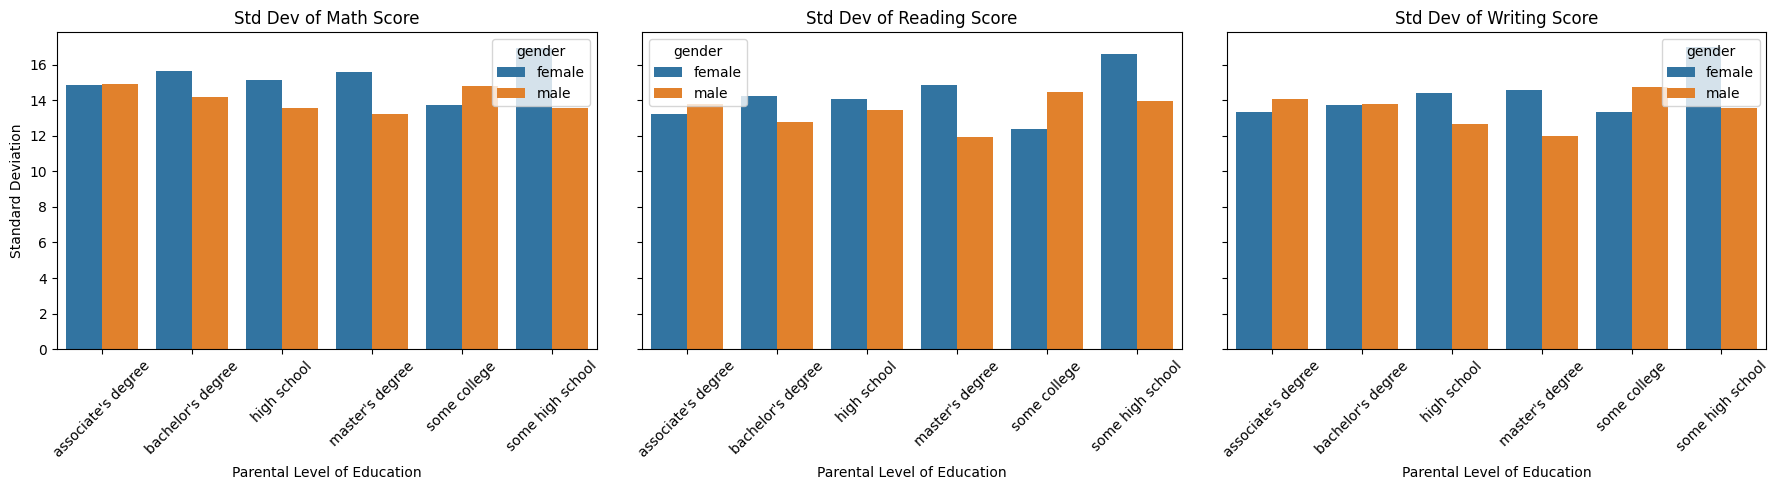

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate std grouped by parental education and gender
std_df = df.groupby(['parental level of education', 'gender'])[['math score', 'reading score', 'writing score']].std().reset_index()

# Set up the figure with 3 subplots (one per score)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

scores = ['math score', 'reading score', 'writing score']

for i, score in enumerate(scores):
    sns.barplot(
        data=std_df,
        x='parental level of education',
        y=score,
        hue='gender',
        ax=axes[i]
    )
    axes[i].set_title(f'Std Dev of {score.title()}')
    axes[i].set_xlabel('Parental Level of Education')
    axes[i].set_ylabel('Standard Deviation' if i == 0 else '')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Answer-
Question-Which parental education level shows the most balanced performance across all subjects?


*    Associate’s degree, Only 2.6 points, the smallest variation among all.
*   Math: 67.4
*   Reading: 70.0
*   Writing: 69.5









Question-

*   Are there specific gender + lunch + education level combinations that consistently underperform?



In [35]:
df.groupby(['gender','lunch','parental level of education'])[['math score','reading score','writing score']].mean()

<ipython-input-35-a6ee728aa513>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['gender','lunch','parental level of education'])[['math score','reading score','writing score']].mean()


math score  reading score  \
gender lunch        parental level of education                              
female free/reduced associate's degree            57.972222      70.250000   
                    bachelor's degree             63.363636      74.000000   
                    high school                   51.621622      63.027027   
                    master's degree               57.785714      72.214286   
                    some college                  58.454545      69.159091   
                    some high school              49.361111      60.916667   
       standard     associate's degree            68.525000      75.862500   
                    bachelor's degree             71.024390      79.048780   
                    high school                   64.368421      71.561404   
                    master's degree               72.045455      79.727273   
                    some college                  69.540541      76.162162   
                    some high school              65.800000      74.472727   
male   free/reduced associate's degree            66.682927      65.365854   
                    bachelor's degree             62.636364      63.863636   
                    high school                   57.757576      57.060606   
                    master's degree               65.900000      67.600000   
                    some college                  62.228571      59.942857   
                    some high school              60.520000      58.960000   
       standard     associate's degree            73.338462      68.738462   
                    bachelor's degree             75.878788      70.909091   
                    high school                   68.028986      63.594203   
                    master's degree               81.692308      77.384615   
                    some college                  72.260274      67.410959   
                    some high school              70.746032      66.968254   

                                                 writing score  
gender lunch        parental level of education                 
female free/reduced associate's degree               69.500000  
                    bachelor's degree                75.818182  
                    high school                      60.567568  
                    master's degree                  72.000000  
                    some college                     68.522727  
                    some high school                 59.000000  
       standard     associate's degree               76.025000  
                    bachelor's degree                79.756098  
                    high school                      70.666667  
                    master's degree                  81.227273  
                    some college                     77.337838  
                    some high school                 74.363636  
male   free/reduced associate's degree               62.975610  
                    bachelor's degree                62.636364  
                    high school                      53.848485  
                    master's degree                  66.900000  
                    some college                     57.657143  
                    some high school                 55.640000  
       standard     associate's degree               66.938462  
                    bachelor's degree                71.000000  
                    high school                      60.782609  
                    master's degree                  77.000000  
                    some college                     65.780822  
                    some high school                 63.650794

<ipython-input-36-e78f74e66cd4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = df.groupby(['parental level of education','gender'])['math score'].std().reset_index()


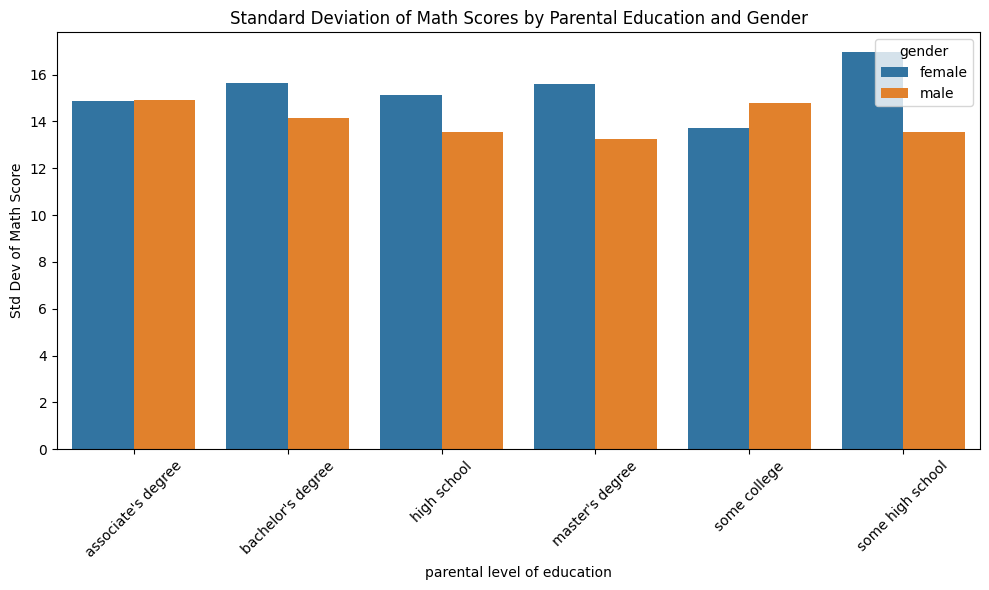

In [36]:
std_df = df.groupby(['parental level of education','gender'])['math score'].std().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=std_df,
            x='parental level of education',
            y='math score',
            hue='gender')
plt.xticks(rotation=45)
plt.title('Standard Deviation of Math Scores by Parental Education and Gender')
plt.ylabel('Std Dev of Math Score')
plt.tight_layout()
plt.show()

Answer-
Question-Are there specific gender + lunch + education level combinations that consistently underperform?


*   Yes, Female + Free/Reduced Lunch + High School Parental Education combination underperforms as it has consistent below-average performance in all subjects.





## Inferential Analysis- with how much confidence we can say that it this assumption is correct. kind of Hypothesis testing

*   T-Test-A t-test is used when you want to determine if the difference in mean scores between two groups is statistically significant, not just due to random chance.
*   ANOVA-To compare more than two groups to see if at least one group’s mean is significantly different from the others.

While a t-test compares 2 groups, ANOVA compares 3 or more groups. ANOVA can be used for 2 groups as well but it will take a longer route and t-test is recommended for 2 groups




## Using T-test

In [37]:
from scipy.stats import ttest_ind

In [38]:
#  Does lunch type affect student performance?
standard_lunch = df[df['lunch'] == 'standard']['math score']
reduced_lunch = df[df['lunch'] == 'free/reduced']['math score']

t_stat, p_val = ttest_ind(standard_lunch, reduced_lunch, equal_var=False) ## t-test



In [39]:
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.50f}")

T-statistic: 11.4841
P-value: 0.00000000000000000000000000055395849439653934937636


In [41]:
if p_val < 0.05:
    print("Lunch type is making significant difference in math scores.")
else:
    print("Lunch type is not making significant difference in math scores.")

Lunch type is making significant difference in math scores.


In [44]:
# Do males and females perform differently in math?
male_scores = df[df['gender'] == 'male']['math score']
female_scores = df[df['gender'] == 'female']['math score']


t_stat, p_val = ttest_ind(male_scores, female_scores, equal_var=False)


print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.50f}")


T-statistic: 5.3980
P-value: 0.00000008420838109090414606055694478337070307816248


In [45]:

# Interpretation
if p_val < 0.05:
    print("There is a significant difference in math scores between males and females.")
else:
    print("No significant difference in math scores between males and females.")

There is a significant difference in math scores between males and females.


In [46]:
# Does completing the test preparation course significantly improve scores?
# Split data by test preparation course completion
completed = df[df['test preparation course'] == 'completed']['math score']
not_completed = df[df['test preparation course'] == 'none']['math score']

t_stat, p_val = ttest_ind(completed, not_completed, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.50f}")

if p_val < 0.05:
    print("test preparation course significantly improves math scores.")
else:
    print("No significant improvement in math scores from completing the test preparation course.")

T-statistic: 5.7870
P-value: 0.00000001042561672206951334729621414963360304106743
test preparation course significantly improves math scores.


## ANOVA

In [47]:
from scipy.stats import f_oneway

In [49]:
 # Does parental level of education affect student scores?
 # Get list of unique education levels
education_levels = df['parental level of education'].unique()


groups = [df[df['parental level of education'] == level]['math score'] for level in education_levels]

# one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.50f}")


F-statistic: 6.5216
P-value: 0.00000559227238410722293608656752184060678700916469


In [51]:
if p_val < 0.05:
    print("There is a significant effect of parental level of education on math scores.")
else:
    print("No significant effect of parental level of education on math scores.")

There is a significant effect of parental level of education on math scores.


## Correlation


*  Close to 1	Strong positive correlation
*  Close to -1	Strong negative correlation
*  Close to 0	No or weak linear correlation









In [52]:
corr_matrix = df[['math score', 'reading score', 'writing score']].corr()
print(corr_matrix)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


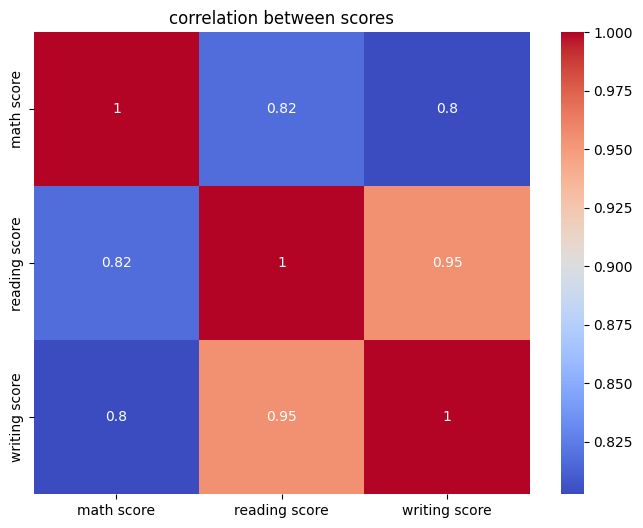

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('correlation between scores')
plt.show()

## Feature Engineering

In [54]:
df['Total score']=df['math score']+df['reading score']+df['writing score']
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [55]:
df['Percentage']=df['Total score']/300*100
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [56]:
def Rank(val):
  if val<40:
    return 'Below average'
  elif val<60:
    return 'Average'
  elif val<80:
    return 'Above average'
  else:
    return 'Excellent'


In [57]:
#####------------MISTAKE-------------#############- it is accepting bool like this
# df['Performance']=df.apply(Rank(df['Percentage']),axis=1)
# df.head(3)

df['Performance']=df.apply(lambda x:Rank(x['Percentage']),axis=1)
df.head(3)



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Percentage,Performance
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Above average
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Excellent
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Excellent


In [58]:
df['Performance'].value_counts()

,count
Performance,
Above average,517
Average,255
Excellent,198
Below average,30


In [59]:
df.groupby('gender')['Performance'].value_counts()

<ipython-input-59-19e6aac66507>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('gender')['Performance'].value_counts()


gender  Performance  
female  Above average    276
        Excellent        118
        Average          108
        Below average     16
male    Above average    241
        Average          147
        Excellent         80
        Below average     14
Name: count, dtype: int64

In [81]:
#  students that have scored 90+ in all subjects
df[(df['math score']>=90) & (df['reading score']>=90) & (df['writing score']>=90)]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Percentage,Performance,math_reading_gap,reading_writing_gap,Math oriented
2,0,1,3,1,1,90,95,93,278,92.666667,3,-5,2,0
114,0,4,1,1,0,99,100,100,299,99.666667,3,-1,0,0
149,1,4,0,0,0,100,100,93,293,97.666667,3,0,7,1
165,0,2,1,1,0,96,100,100,296,98.666667,3,-4,0,0
179,0,3,5,1,0,97,100,100,297,99.000000,3,-3,0,0
263,0,4,2,1,1,99,93,90,282,94.000000,3,6,3,1
451,0,4,4,1,1,100,92,97,289,96.333333,3,8,-5,1
458,0,4,1,1,1,100,100,100,300,100.000000,3,0,0,0
474,0,1,0,1,0,90,90,91,271,90.333333,3,0,-1,0
546,0,0,5,1,0,92,100,97,289,96.333333,3,-8,3,0


28 students have scored 90+ in all subjects

In [60]:
df.groupby('Performance')['math score'].mean()

,math score
Performance,
Above average,68.077369
Average,51.431373
Below average,30.700000
Excellent,85.136364


In [61]:
# These show if a student is stronger in one area than another — could help cluster unbalanced learners.
df['math_reading_gap'] = df['math score'] - df['reading score']
df['reading_writing_gap'] = df['reading score'] - df['writing score']

In [62]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Percentage,Performance,math_reading_gap,reading_writing_gap
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Above average,0,-2
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Excellent,-21,2
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Excellent,-5,2


In [63]:
# checks inclination towards math
df['Math oriented'] = df['math score'] > df[['reading score', 'writing score']].mean(axis=1)

In [64]:
df['Math oriented'].value_counts()

,count
Math oriented,
False,617
True,383


In [65]:
df.groupby('gender')['Math oriented'].value_counts()

<ipython-input-65-807937323457>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('gender')['Math oriented'].value_counts()


gender  Math oriented
female  False            488
        True              30
male    True             353
        False            129
Name: count, dtype: int64

<ipython-input-66-e9032eefe1ec>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Math oriented',y='gender',palette='Set1')


<Axes: xlabel='Math oriented', ylabel='gender'>

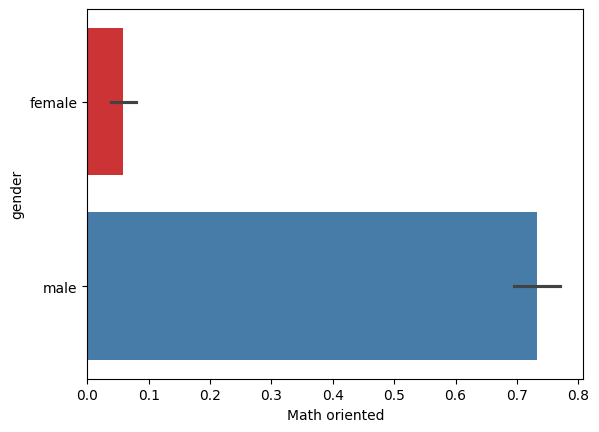

In [66]:
sns.barplot(data=df,x='Math oriented',y='gender',palette='Set1')

In [67]:
df.groupby(['parental level of education','gender'])['Performance'].value_counts()

<ipython-input-67-38d5d8407830>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['parental level of education','gender'])['Performance'].value_counts()


parental level of education  gender  Performance  
associate's degree           female  Above average    63
                                     Excellent        28
                                     Average          24
                                     Below average     1
                             male    Above average    49
                                     Average          33
                                     Excellent        23
                                     Below average     1
bachelor's degree            female  Above average    32
                                     Excellent        21
                                     Average           9
                                     Below average     1
                             male    Above average    34
                                     Average          10
                                     Excellent        10
                                     Below average     1
high school                  female  Above average    52
                                     Average          25
                                     Excellent        12
                                     Below average     5
                             male    Above average    48
                                     Average          41
                                     Excellent         8
                                     Below average     5
master's degree              female  Above average    16
                                     Excellent        13
                                     Average           7
                                     Below average     0
                             male    Above average    13
                                     Excellent         7
                                     Average           3
                                     Below average     0
some college                 female  Above average    70
                                     Excellent        28
                                     Average          17
                                     Below average     3
                             male    Above average    55
                                     Average          32
                                     Excellent        18
                                     Below average     3
some high school             female  Above average    43
                                     Average          26
                                     Excellent        16
                                     Below average     6
                             male    Above average    42
                                     Average          28
                                     Excellent        14
                                     Below average     4
Name: count, dtype: int64

<ipython-input-68-60c47b2b007f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped3=df.groupby(['parental level of education','gender'])['Performance'].value_counts().reset_index()
<ipython-input-68-60c47b2b007f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


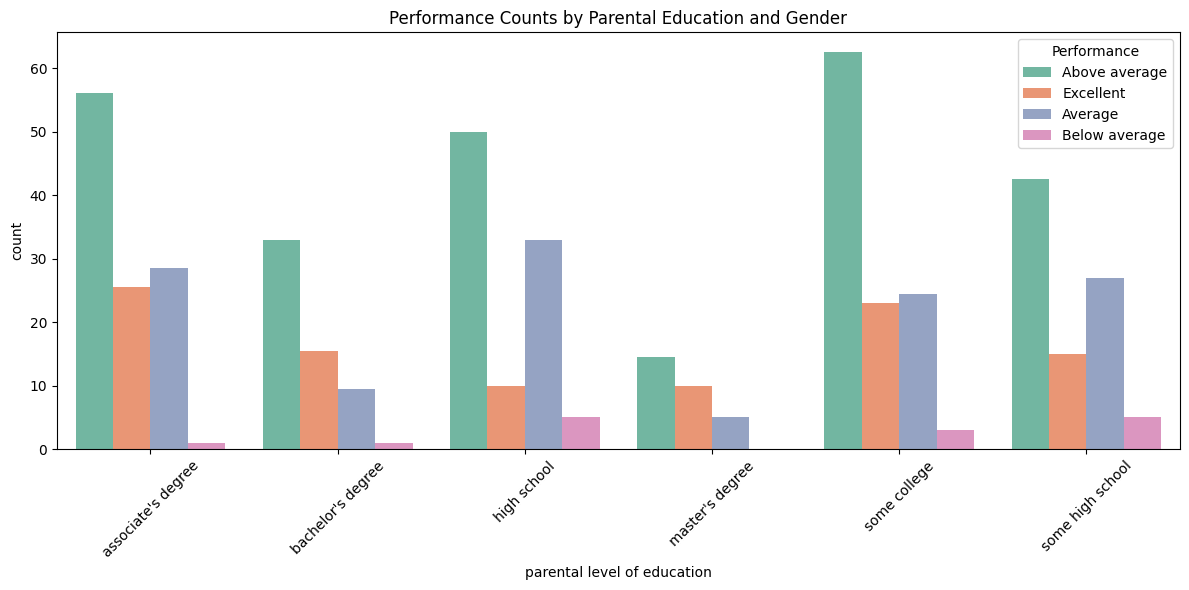

In [68]:
grouped3=df.groupby(['parental level of education','gender'])['Performance'].value_counts().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(
    data=grouped3,
    x='parental level of education',
    y='count',
    hue='Performance',
    palette='Set2',
    ci=None
)
plt.xticks(rotation=45)
plt.title('Performance Counts by Parental Education and Gender')
plt.tight_layout()
plt.show()

## Label encoding

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
df['gender']=LabelEncoder().fit_transform(df['gender'])
df['lunch']=LabelEncoder().fit_transform(df['lunch'])
df['test preparation course']=LabelEncoder().fit_transform(df['test preparation course'])
df['race/ethnicity']=LabelEncoder().fit_transform(df['race/ethnicity'])
df['parental level of education']=LabelEncoder().fit_transform(df['parental level of education'])
df['Performance']=LabelEncoder().fit_transform(df['Performance'])
df['Math oriented']=LabelEncoder().fit_transform(df['Math oriented'])
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Percentage,Performance,math_reading_gap,reading_writing_gap,Math oriented
0,0,1,1,1,1,72,72,74,218,72.666667,0,0,-2,0
1,0,2,4,1,0,69,90,88,247,82.333333,3,-21,2,0
2,0,1,3,1,1,90,95,93,278,92.666667,3,-5,2,0


✅ Recommendations:
Encourage test prep courses, especially for disadvantaged or lower parental education groups.

Address the math performance gap, particularly for female students and those with reduced lunch.

Provide targeted academic support based on student background data (parental education, lunch status).

Consider intervention programs that combine test prep with mentorship, especially for underperforming groups.
